In [1]:
import requests
from bs4 import BeautifulSoup

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from collections import Counter
import json,re,random
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import spacy

#preparing the tools


ps = PorterStemmer()
lz = WordNetLemmatizer()
en_stopwords = stopwords.words('english')


In [2]:
# Load SpaCy models
nlp_sm = spacy.load("en_core_web_sm")
nlp_trf = spacy.load("en_core_web_trf")

In [ ]:
# Run if SpaCy model hasn't been downloaded before
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_trf

In [3]:
# Need to run if stopwords not downloaded before.
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yongs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yongs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yongs\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
sample_file = './reviewSamples20.json'

# Clean data
def clean_text(sum_string):
    s = re.sub('[\r\n\s]+',' ',sum_string) #clean whitespce and newline
    return s

#data importing and formating
def process_raw_data(data_in_weird_format_file):
    with open(data_in_weird_format_file,'r') as f:
        raw_data = f.read()
    data = raw_data.split('}\n')
    return [x+'}' for x in data if x != '']
data = process_raw_data(sample_file)
print(f'Processed {len(data)} lines of data')

_sample_data = json.loads(random.choice(data))
print('\n\nSample data')
print(json.dumps(_sample_data, indent=4, sort_keys=True))



Processed 20 lines of data


Sample data
{
    "business_id": "CGUK3cd2gxp2q3KPY19Oog",
    "cool": 0,
    "date": "2018-04-15 11:34:34",
    "funny": 0,
    "review_id": "LrO2MkIWIjAoOeS5WImnrQ",
    "stars": 5.0,
    "text": "Yum!! Had the kale grits and would definitely have those again! Menu choices are unique, farm fresh and delicious!",
    "useful": 0,
    "user_id": "hzny0aF2jcUaY8rXN2bfJQ"
}


In [5]:
#Check if they have the same keys
json_list = [json.loads(x) for x in data]
for i,_json in enumerate(json_list):
    print(f"{i}\t{_json.keys()}")

0	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
1	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
2	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
3	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
4	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
5	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
6	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
7	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
8	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
9	dict_keys(['review_id', 'user_id', 'business_id', 'st

In [6]:
big_data_file = './reviewSelected100.json'

big_data = process_raw_data(big_data_file)

big_json = [json.loads(x) for x in big_data]

#Collecting all unique the business id
business_id_list = list({x['business_id'] for x in big_json})  #make it a set via set comprehension {}, then call tolist

#Selecting a random business and their review
chosen_id_1 = random.choice(business_id_list)
chosen_business_1 = [x for x in big_json if x['business_id'] == chosen_id_1]

chosen_id_2 = chosen_id_1
while chosen_id_2 == chosen_id_1:
    chosen_id_2 = random.choice(business_id_list)
chosen_business_2 = [x for x in big_json if x['business_id'] == chosen_id_2]
#Because we have to repeat the whole thing for 2 businesses, we need to wrap the functions into a single wrapper for reuse


In [7]:
for y in ['useful','stars','funny','cool']:
    print({y:Counter(x[y] for x in big_json)})
    print()

{'useful': Counter({0: 8238, 1: 3265, 2: 1552, 3: 805, 4: 442, 5: 280, 6: 164, 7: 122, 8: 76, 9: 67, 10: 51, 11: 50, 12: 32, 13: 29, 14: 21, 15: 18, 16: 10, 20: 9, 19: 7, 22: 7, 23: 6, 24: 6, 18: 6, 17: 5, 21: 5, 25: 4, 30: 4, 28: 2, 34: 2, 31: 2, 27: 1, 40: 1, 65: 1, 35: 1, 46: 1, 41: 1, 48: 1, 36: 1, 85: 1, 191: 1, 43: 1, 59: 1, 64: 1})}

{'stars': Counter({5.0: 6159, 4.0: 3559, 1.0: 2306, 3.0: 1904, 2.0: 1372})}

{'funny': Counter({0: 12268, 1: 1862, 2: 563, 3: 231, 4: 107, 5: 81, 6: 61, 7: 31, 9: 21, 8: 17, 10: 10, 11: 9, 13: 6, 19: 4, 12: 4, 25: 3, 15: 3, 17: 2, 16: 2, 35: 2, 20: 2, 40: 2, 28: 2, 33: 1, 18: 1, 14: 1, 122: 1, 38: 1, 56: 1, 43: 1})}

{'cool': Counter({0: 11607, 1: 2299, 2: 734, 3: 259, 4: 115, 5: 74, 6: 57, 7: 31, 9: 27, 8: 18, 10: 15, 13: 11, 11: 10, 12: 9, 14: 5, 18: 5, 15: 3, 19: 2, 60: 2, 17: 2, 24: 2, 20: 2, 32: 1, 44: 1, 43: 1, 16: 1, 40: 1, 34: 1, 82: 1, 23: 1, 22: 1, 180: 1, 41: 1})}



In [8]:

#Wrapper for analysis  -- not too sure if the inside functions should throw outside anot it's quite task specific
def analyze_business(chosen_business):
    
    #collating all reviews into one string
    all_dem_reviews = ''.join([x['text'] for x in chosen_business])


    all_dem_clean_reviews = clean_text(all_dem_reviews)

    #for word distribution, we need to clean all punctuations and symbols as well as standardize the case
    def build_word_frequency(text,blacklist=[],stemmer=None):
        assert type(text) == str, "Expecting a str input"
        s = re.sub('[^a-z]+',' ',text.lower())
        s = re.sub('[\n\r\s]+',' ',s)
        vocab = Counter()
        for word in s.split(' '):
            if word in blacklist:
                continue
            if stemmer!= None:
                word = stemmer.stem(word)
            vocab.update([word])  #preventing the counter object to update using each letter by using []
        return vocab

    review_vocab_bef_stem = build_word_frequency(all_dem_clean_reviews,blacklist=en_stopwords)
    review_vocab_after_stem = build_word_frequency(all_dem_clean_reviews,blacklist=en_stopwords,stemmer = ps)

    print("Before stemming, most 10 common words:")
    for x in review_vocab_bef_stem.most_common(10):
        print('\t',x[0].ljust(15,' '),x[1])  #justify the column abit

    print('\n\n')

    print("After stemming, most 10 common words:")
    for x in review_vocab_after_stem.most_common(10):
        print('\t',x[0].ljust(15,' '),x[1])
    
    #Plotting the word distribution
    def plot_word_freq_dist(the_vocab):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        line = ax.plot(the_vocab.values())

        ax.set_yscale('log')
        plt.show()

    plot_word_freq_dist(review_vocab_after_stem)
        


Before stemming, most 10 common words:
	 food            124
	 chicken         90
	 dosa            76
	 indian          74
	 good            66
	 service         59
	 place           52
	 like            47
	 butter          40
	 would           40



After stemming, most 10 common words:
	 food            126
	 chicken         90
	 dosa            86
	 indian          75
	 good            67
	 place           66
	 servic          59
	 like            52
	 order           51
	 restaur         46


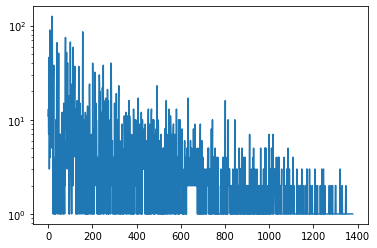

In [9]:
analyze_business(chosen_business_1)

Before stemming, most 10 common words:
	 food            84
	 place           72
	 good            67
	 bar             52
	 service         52
	 get             45
	 like            45
	 great           40
	 time            36
	 go              36



After stemming, most 10 common words:
	 food            84
	 place           76
	 good            69
	 order           59
	 bar             56
	 go              54
	 drink           53
	 servic          53
	 get             52
	 like            50


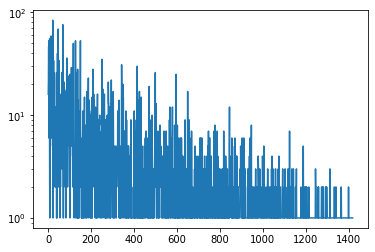

In [10]:
analyze_business(chosen_business_2)

## 3.2.2 POS Tagging

```
 git blame manekiyong
```
TBD:
* Compare with another Library?
* Compare token.tag_ vs token.pos_ (fine-grained vs coarse grained)

In [10]:
def analyze_pos(sampled_reviews):
    for review in sampled_reviews:
        cleaned_review = clean_text(review['text'])
        print(cleaned_review)
        tokenized_review = word_tokenize(cleaned_review)
        print(nltk.pos_tag(tokenized_review)) #NLTK POS taggers uses tag from the Penn Tree Bank tagset. 
        print("")
        # To find another POS Tagging technique for comparison
        
def pos_spacy(sampled_reviews):
    #sm F1 for POS 0.97, trf F1 for POS 0.98
    pos_df = pd.DataFrame(columns=["token", "pos_1", "pos_2", "match"])
    for review in sampled_reviews:
        doc_sm = nlp_sm(review['text'])
        doc_trf = nlp_trf(review['text'])
        for token_sm, token_trf in zip(doc_sm, doc_trf):
            temp_dict = {
                "token":str(token_sm),
                "pos_1":token_sm.pos_,
                "pos_2":token_trf.pos_,
                "match":token_trf.pos_== token_sm.pos_
            }
            pos_df=pos_df.append(temp_dict, ignore_index=True)
    return pos_df

In [11]:
random_reviews = random.sample(big_json,5)
# analyze_pos(random_reviews)
df = pos_spacy(random_reviews)

In [12]:
# tokenized_review = word_tokenize(random_reviews[0]['text'])
# doc_trf = nlp_trf(random_reviews[0]['text'])
# print(len(tokenized_review))
# len(doc_trf)
# for index, i in enumerate(doc_trf):
#     print(i, tokenized_review[index])

In [13]:
df

,token,pos_1,pos_2,match
0,This,DET,DET,True
1,is,AUX,AUX,True
2,a,DET,DET,True
3,chain,NOUN,NOUN,True
4,restaurant,NOUN,NOUN,True
...,...,...,...,...
432,good,ADJ,ADJ,True
433,location,NOUN,NOUN,True
434,and,CCONJ,CCONJ,True
435,ambience,NOUN,NOUN,True


## 3.2.3 Writing Styles

Discussion points based on the formality of the way of writing, proper use of English sentence structure such as good grammar, proper pronouns, capitalization, and terms used in the posts.

### Stack Overflow
Stack Overflow has a relatively less formal way of writing. Informal words like "Doesn't, I'm, I've..." are more prevalent that its counterpart. In general, we could observe decent use of English and sentence structure. However, that could be better. In many posts, the start of their sentences and bullet points are not capitalised. Moreover, usage of some words are incorrect e.g. Conjunctions used in the post body "So I can filter them out..." or "And now we see that using ...". It is worth noting that there are technical terms and codes used in Stack Overflow that could be Out Of Vocabulary (OOV) words. For example, tree_.__getstate__() and graphviz' .dot file are used in the posts but the words are OOV. Therefore, tokenization need to be altered to account for unknown tokens (UNKs). Similarly, we should use a software-specific POS tagger to handle the text from Stack Overflow.


### Hardware Zone
Hardware Zone has two main components - news and forums. The news portion is similar to Channel NewsAsia as most of the news are retrieved from proper news websites, our group will be focusing on the forums. The forums are filled with informal way of writing. The users are mainly Singaporeans, which can explain the common use of Singlish, improper English and structure. On one of the posts - 'any reviews for their boxes? like streams always buffering??', we can observe the lack of capitalisation, use of broken English and exccessive use of punctuation. For another post, it utilised Singlish - 'Change to dark mode lor'. There is also frequent use of emojis or expressions in many posts. Hence, the terms used could be less complex in Hardware Zone as there is very little complex technical terms and unique words used as compared to Stack Overflow.

### Channel NewsAsia
Channel NewsAsia is a news platform. The journalists are proficient in English and there are many layers of vetting before a post is published. On that account, Channel NewsAsia has a formal way of writing, the most proper use of English sentence structure as compared to the other two counterparts. The posts have proper punctuations and sentence structures. Each sentence is gramatically correct, has capitalisation at the start and proper nouns are capitalised. There might be some unknown terms used such as 'Oxbotica' or 'AppliedEV' but with proper sentence structures, there is enough context to understand. Out of all 3  websites, it would be the easiest to apply tokenization and POS tagging directly to this news posts.

Sources:
Stack Overflow
https://stackoverflow.com/questions/32506951/how-to-explore-a-decision-tree-built-using-scikit-learn
https://stackoverflow.com/questions/3437059/does-python-have-a-string-contains-substring-method

Hardware Zone
https://forums.hardwarezone.com.sg/threads/new-forum-bugs-reporting-list.6488755/
https://forums.hardwarezone.com.sg/threads/android-tv-box.5678618/

Channel NewsAsia
https://www.channelnewsasia.com/business/oxbotica-develop-multi-purpose-self-driving-vehicle-appliedev-2162676
https://www.channelnewsasia.com/business/new-zealand-banks-post-office-hit-outages-apparent-cyber-attack-2162891

## Most frequent ⟨ Noun - Adjective ⟩ pairs for each rating.

```
git blame sun aixin

consider word cloud
```

Limitations: 
* Assuming i have a phrase: `Not a good thing | RB | DT | JJ | NN | ` , solely looking at ADJ NOUN here would discard the negation (Not)
* Since we are only analyzing English text, some foreign cuisines may not be captured; for example, `dolsot bibimbap` would be seen as proper noun, but in actual fact, it is translated to `Hot stone pot bibimbap`

Example sentences:
* "She was a beautiful, tall, thin, young, black-haired, Scottish woman."
    * beautiful woman
    * tall woman
    * thin woman
    * young woman
    * black haired woman
    * scottish woman
* "This is a very fat and orange cat"
    * fat cat
    * orange cat
* "The food is bland, atrocious and cold"
    * bland food
    * atrocious food
    * cold food

In [9]:
# Restructure big_json to group by business & the stars
business_dict = {}
for i in big_json: 
    if business_dict.get(i['business_id'])==None:
        business_dict[i['business_id']] = {}
        business_dict[i['business_id']]['1'] = []
        business_dict[i['business_id']]['2'] = []
        business_dict[i['business_id']]['3'] = []
        business_dict[i['business_id']]['4'] = []
        business_dict[i['business_id']]['5'] = []
    if i['stars']==1:
        business_dict[i['business_id']]['1'].append(i)
    elif i['stars'] == 2:
        business_dict[i['business_id']]['2'].append(i)
    elif i['stars'] ==3:
        business_dict[i['business_id']]['3'].append(i)
    elif i['stars'] == 4:
        business_dict[i['business_id']]['4'].append(i)
    else:
        business_dict[i['business_id']]['5'].append(i)

In [15]:
def generate_phrase_dict(review_list):
    phrase_dict = {}
    adj_list = ['JJ', 'JJR', 'JJS'] #JJ: Adjective; JJR: comparative adjective; JJS: superlative adjective
    noun_list = ['NN', 'NNS', 'NNP', 'NNPS'] #NN: Singular Noun; #NNS: Plural Noun; #NNP: Singular Proper Noun, #NNPS: Plural Proper Noun
    for review in review_list:
        doc = nlp_trf(review['text'])
        for phrase in doc.noun_chunks:
            start = -1
            fin = -1
            print(phrase, end=" | ")
            for index, i in enumerate(phrase):
                print(i.tag_, end=" | ")
                if i.tag_ in adj_list and start == -1:

                    start = index
            for index, i in enumerate(reversed(phrase)):
                if i.tag_ in noun_list and fin == -1:
                    fin = len(phrase)-index
                    break
            print("")
            if start==-1 or fin==-1:
                print("No adj-noun found")
            else:
                print("Phrase:", phrase[start:fin])
                sub_phrase = str(phrase[start:fin]).lower()
                if sub_phrase in phrase_dict:
                    phrase_dict[sub_phrase] = phrase_dict[sub_phrase]+1
                else:
                    phrase_dict[sub_phrase]=1
            print("")     
    return phrase_dict

In [43]:
def generate_phrase_dict_tree(review_list):
    phrase_dict = {}
    for review in review_list:
        doc = nlp_trf(review['text'])
        parsed_list = [0]*len(doc) # A list used to tracked which tokens have been parsed before.
        for token in doc:
            if parsed_list[token.i] == 1: # If token has been parsed before, skip this token to prevent double parsing
                continue
            phrase=""
            
            # Capture straightforward adjective-nouns
            if token.pos_ == 'ADJ':
                cur_tok = token
                # For chained adjectives
                # e.g. Black-haired lady
                while cur_tok.dep_ == 'amod' and cur_tok.head.pos_ == 'ADJ': 
                    parsed_list[cur_tok.i] = 1
                    phrase=phrase+" "+cur_tok.text
                    cur_tok=cur_tok.head
                # Get the noun after finding the necessary adjectives
                if cur_tok.dep_ == 'amod' and cur_tok.head.pos_ == 'NOUN':
                    parsed_list[cur_tok.i] = 1
                    phrase = phrase+" "+cur_tok.text+" "+cur_tok.head.text
                if phrase == '':
                    continue
                phrase=phrase.lower()
                phrase = phrase[1:] # rid whitespace infront
                if phrase in phrase_dict:
                    phrase_dict[phrase] = phrase_dict[phrase]+1
                else:
                    phrase_dict[phrase]=1
            # Capture adjective-nouns separated by AUX, e.g. The Cat is Fat -> fat cat
            if token.pos_ == 'AUX':
                phrase_list = []
                # Search for NOUN/ADJ related to this AUX
                aux_child = [child for child in token.children]
                this_noun=""
                this_adj=""
                for child in aux_child:
                    if child.pos_ == 'NOUN':
                        this_noun = child
                    if child.pos_ == 'ADJ':
                        this_adj = child
                # If no adj-noun pair is found, terminate
                if str(this_noun)=="" or str(this_adj)=="":
                    continue
                phrase_list.append(this_adj.text+" "+this_noun.text)
                parsed_list[this_adj.i] = 1
                parsed_list[this_noun.i] = 1
                adj_child = [child for child in this_adj.children]
                child_pos = [child.pos_ for child in adj_child]
                # Traverse adjective's child to see if any other adjective is conjunction with this adjective
                # e.g. Fat and Orange cat -> fat cat, orange cat 
                # Recursion not required because there should only be at most 1 ADJ among the children
                while len(adj_child) != 0 and 'ADJ' in child_pos:
                    for child in adj_child:
                        if child.pos_ == 'ADJ':
                            phrase_list.append(child.text+" "+this_noun.text)
                            parsed_list[child.i] = 1
                            adj_child = [grandchild for grandchild in child.children]
                            child_pos = [grandchild.pos_ for grandchild in adj_child]

                for phrase in phrase_list:
#                     if phrase == '':
#                         print("R2", token.i, token.text,'|\t', token.pos_, token.dep_,'|', token.head.text,'|', token.head.pos_,'|',
#                     [child for child in token.children])
                    phrase=phrase.lower()
                    if phrase in phrase_dict:
                        phrase_dict[phrase] = phrase_dict[phrase]+1
                    else:
                        phrase_dict[phrase]=1

            
    return phrase_dict

def get_random_reviews(dict_by_biz, stars, num):
    selected = []
    review_list = []
    count = 0
    while count != num:
        sampled_biz = random.sample(sorted(dict_by_biz),num-count)
        for i in sampled_biz:
            if len(dict_by_biz[i][str(stars)]) == 0: # If no specific rating found for particular business, skip
                continue
            if i in selected: # If a review from a particular business have been extracted before
                continue
            count+=1
            selected.append(i)
            random_review = random.sample(dict_by_biz[i][str(stars)],1)[0]
            review_list.append(random_review)
    return review_list

In [17]:
# Populate individual list by stars
stars_1 = get_random_reviews(business_dict,1, 50)
stars_2 = get_random_reviews(business_dict,2, 20)
stars_3 = get_random_reviews(business_dict,3, 20)
stars_4 = get_random_reviews(business_dict,4, 20)
stars_5 = get_random_reviews(business_dict,5, 20)


In [ ]:
stars_1_pt = generate_phrase_dict_tree(stars_1)
stars_2_pt = generate_phrase_dict_tree(stars_2)
stars_3_pt = generate_phrase_dict_tree(stars_3)
stars_4_pt = generate_phrase_dict_tree(stars_4)
stars_5_pt = generate_phrase_dict_tree(stars_5)

In [99]:
print("1 Star")
sorted_dict = {k: v for k, v in sorted(stars_1_pt.items(), key=lambda item: item[1], reverse=True)}.items()
print(list(sorted_dict)[:10])
print("2 Star")
sorted_dict = {k: v for k, v in sorted(stars_2_pt.items(), key=lambda item: item[1], reverse=True)}.items()
print(list(sorted_dict)[:10])
print("3 Star")
sorted_dict = {k: v for k, v in sorted(stars_3_pt.items(), key=lambda item: item[1], reverse=True)}.items()
print(list(sorted_dict)[:10])
print("4 Star")
sorted_dict = {k: v for k, v in sorted(stars_4_pt.items(), key=lambda item: item[1], reverse=True)}.items()
print(list(sorted_dict)[:10])
print("5 Star")
sorted_dict = {k: v for k, v in sorted(stars_5_pt.items(), key=lambda item: item[1], reverse=True)}.items()
print(list(sorted_dict)[:10])

1 Star
[('new heater', 3), ('first time', 3), ('french toast', 3), ('terrible service', 2), ('first experience', 2), ('real bbq', 2), ('many options', 2), ('same thing', 2), ('worst wings', 2), ('huge disappointment', 2)]
2 Star
[('few things', 2), ('only reason', 2), ('other locations', 2), ('off night', 2), ('second chance', 2), ('buttery crust', 2), ('front desk', 2), ('chinese food', 2), ('unpleasant things', 1), ('other waitresses', 1)]
3 Star
[('puffy crust', 2), ('most shops', 2), ('average food', 2), ('last time', 2), ('bad gauntlet', 1), ('own name', 1), ('specific name', 1), ('generic name', 1), ('italian mobster', 1), ('last name', 1)]
4 Star
[('first time', 4), ('next time', 2), ('great cocktails', 2), ('good food', 2), ('great food', 2), ('outdated time', 1), ('tasty', 1), ('few toppings', 1), ('half way', 1), ('plain chips', 1)]
5 Star
[('good flavor', 2), ('black olives', 2), ('great selection', 2), ('hawaiian food', 2), ('great entrays', 1), ('consistent wings', 1), ('m

In [ ]:
# Show dependency graph
doc = nlp_trf("this is a very fat and orange cat")
for token in doc:
    print(token.text,'|',token.dep_,'|', token.head.text,'|', token.head.pos_,'|',
            [child for child in token.children])
spacy.displacy.render(doc, style='dep')

In [193]:
spacy.explain("amod")

'adjectival modifier'

## 3.3 Indicative Adjective Phrases 

gonna need:
* Adjective pair extractor
* tf-idf 

In [ ]:
business_dict

In [44]:
# Generate all business phrases
biz_phrases = {}
for index, i in enumerate(business_dict):
    print(index, i)
    biz_review = []
    for j in range(1,6):
        biz_review.extend(business_dict[i][str(j)])
    biz_phrases[i] = generate_phrase_dict_tree(biz_review)

0 ZBE-H_aUlicix_9vUGQPIQ
1 e-YnECeZNt8ngm0tu4X9mQ
2 j7HO1YeMQGYo3KibMXZ5vg
3 7e3PZzUpG5FYOTGt3O3ePA
4 vuHzLZ7nAeT-EiecOkS5Og
5 k99YNCx5KcQPR7oeTgAOzg
6 hXzoNgpkC86K_Jfg_zMHvA
7 wPgp3oddFUzpGrQc__HYhg
8 QeEQXdto_4wFRaNKyIygRA
9 a4GRh1TlOVhPD401mSPLZg
10 4tjKsIaBXCDUP9PL82Vu_A
11 pYJtM8BaRUwNg3hkO3v2sQ
12 793LPDn8axywoOANbDeAZw
13 --I7YYLada0tSLkORTHb5Q
14 caq9CTtWB-8K0tdFUhTfAQ
15 z8Em-bhZI3Mmspml7tj6tg
16 l07ctcrDMV--TYwe3uzebQ
17 pJnN5PxqFPGZW2pJWkQtzA
18 CQxhyLM833WF45yrS9yeAA
19 bmm5F5smQrHCEkFYjwrQ9w
20 w5LUtmw4G1KD7qAntqGd9w
21 AEx2SYEUJmTxVVB18LlCwA
22 dcrL22ant20s1thjdVGhLw
23 rubyBEGXLBLU_JAuEtKEuw
24 NV5Q8ZhDSh_oI8ZOnn72Lw
25 p6FPcgLymnpk_gAyQuW_Mw
26 sWh-N7K3ebRHZKhhH01mJQ
27 paCgjLEUEVM38VZ6Sjghgg
28 oICXzFAaUMrYGzjRWmkw4Q
29 vxuyl9IVum8zngXgvbT4Jg
30 Mx8jCUdhaNbMgx_04DWHdA
31 IUMyUYOIR9UQ7XGIEQKOuA
32 kAmNIcJpAZIZIp5uSMAYLA
33 NRAmrbIGgXgH5uYv8GGJ5A
34 mOzOYgXYOmkdNfZr453PgQ
35 KjjNv4YFzBFnsBh2ncH1Iw
36 84DjKzaR26vphu9fNI9nKg
37 c1_adyjYG6JEa1PZAXMOBg
38 rv9T1qGHbh9eXqFpKEP

In [45]:

with open('business_phrase.json', 'w') as fp:
    json.dump(biz_phrases, fp)

In [51]:
unique_phrase = []
for i in biz_phrases:
    for j in biz_phrases[i]:
        unique_phrase.append(j)

In [53]:
unique_phrase = list(set(unique_phrase))

In [54]:
len(unique_phrase)

41806